In [1]:
#IMPORTING LIBRARIES
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
client_dataset = pd.read_csv(r'C:\Users\siddd\OneDrive\Documents\Churn_Modelling.csv')
                             

In [7]:
client_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
client_dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace = True)

In [10]:
client_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
client_dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


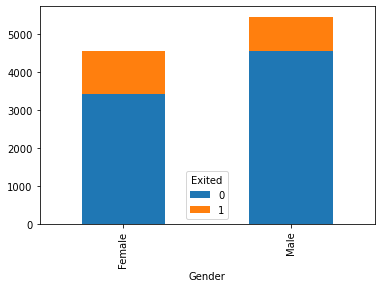

In [12]:
counts = client_dataset.groupby(['Gender', 'Exited']).Exited.count().unstack()

counts.plot(kind='bar', stacked=True)

In [13]:
print(counts)

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


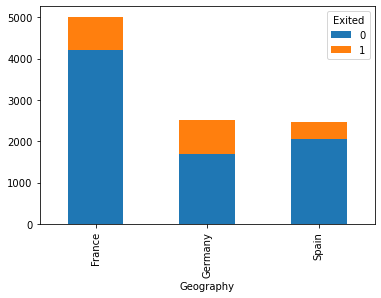

In [15]:
counts = client_dataset.groupby(['Geography', 'Exited']).Exited.count().unstack()

counts.plot(kind='bar', stacked=True)

In [16]:
print(counts)


Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


In [ ]:
#DATA PREPROCESSING

In [18]:
tempdata = client_dataset.drop(['Geography', 'Gender'], axis=1)

In [19]:
Geography = pd.get_dummies(client_dataset.Geography).iloc[:,1:]

Gender = pd.get_dummies(client_dataset.Gender).iloc[:,1:]

In [20]:
client_dataset = pd.concat([tempdata,Geography,Gender], axis=1)


In [21]:
client_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
#DIVIDING DATA INTO TRAINING AND TEST SETS

In [22]:
dataset_features = client_dataset.drop(['Exited'], axis=1)

dataset_labels = client_dataset['Exited']

In [23]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21)

In [24]:
#USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier as rfc

rfc_object = rfc(n_estimators=200, random_state=0)

rfc_object.fit(train_features, train_labels)

predicted_labels = rfc_object.predict(test_features)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(test_labels, predicted_labels))

print(confusion_matrix(test_labels, predicted_labels))

print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1600
           1       0.76      0.45      0.56       400

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

[[1544   56]
 [ 221  179]]
0.8615


In [26]:
#USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_object = LogisticRegression()

lr_object.fit(train_features, train_labels)

predicted_labels = lr_object.predict(test_features)

In [27]:
print(classification_report(test_labels, predicted_labels))

print(confusion_matrix(test_labels, predicted_labels))

print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1600
           1       0.30      0.05      0.09       400

    accuracy                           0.79      2000
   macro avg       0.55      0.51      0.48      2000
weighted avg       0.70      0.79      0.72      2000

[[1552   48]
 [ 379   21]]
0.7865


In [ ]:
#We tried two models and the results showed that the Random Forest algorithm performs best with an accuracy of 86.15%.